In [1]:
import numpy as np
from tiny_gp import TinyGP, GeneticSolver
import os
TinyGP.set_java_path("java")  # set path to JVM

Usage example

In [2]:
from tiny_gp import Operation, FitnessFunction
# read in data
targets = list()
with open("./problem.dat", "r") as f:
    line = f.readline()
    varnumber, _, _, _, fitnesscases = [int(s) for s in line.split()]
    for line in f:
        targets.extend([float(s) for s in line.split()])

targets_np = np.array(targets)
targets_np = targets_np.reshape([fitnesscases, varnumber + 1])

Server started
-- TINY GP (Java version) --
SEED=-1
MAX_LEN=10000
POPSIZE=100000
DEPTH=5
CROSSOVER_PROB=0.9
PMUT_PER_NODE=0.05
MIN_RANDOM=-5.0
MAX_RANDOM=5.0
GENERATIONS=30
TSIZE=2
----------------------------------
Generation=0 Avg Fitness=5337.85993795015 Best Fitness=202.0 Avg Size=10.97424
Best Individual: (X1 * X1)
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■] 100%  0,15s
Generation=1 Avg Fitness=3728.514001607517 Best Fitness=202.0 Avg Size=11.6301
Best Individual: (X1 * X1)
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■] 100%  0,12s
Generation=2 Avg Fitness=3424.6931852963107 Best Fitness=173.63959846540547 Avg Size=14.1646
Best Individual: (((X1 / 0.9175735407047618) - ((-3.627452654792791 / -1.8693457289200621) / (((2.6714391456794138 + -0.5996539797245823) - -4.32224705950469) + (-4.824953797593333 + 4.302563536020429)))) * X1)
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

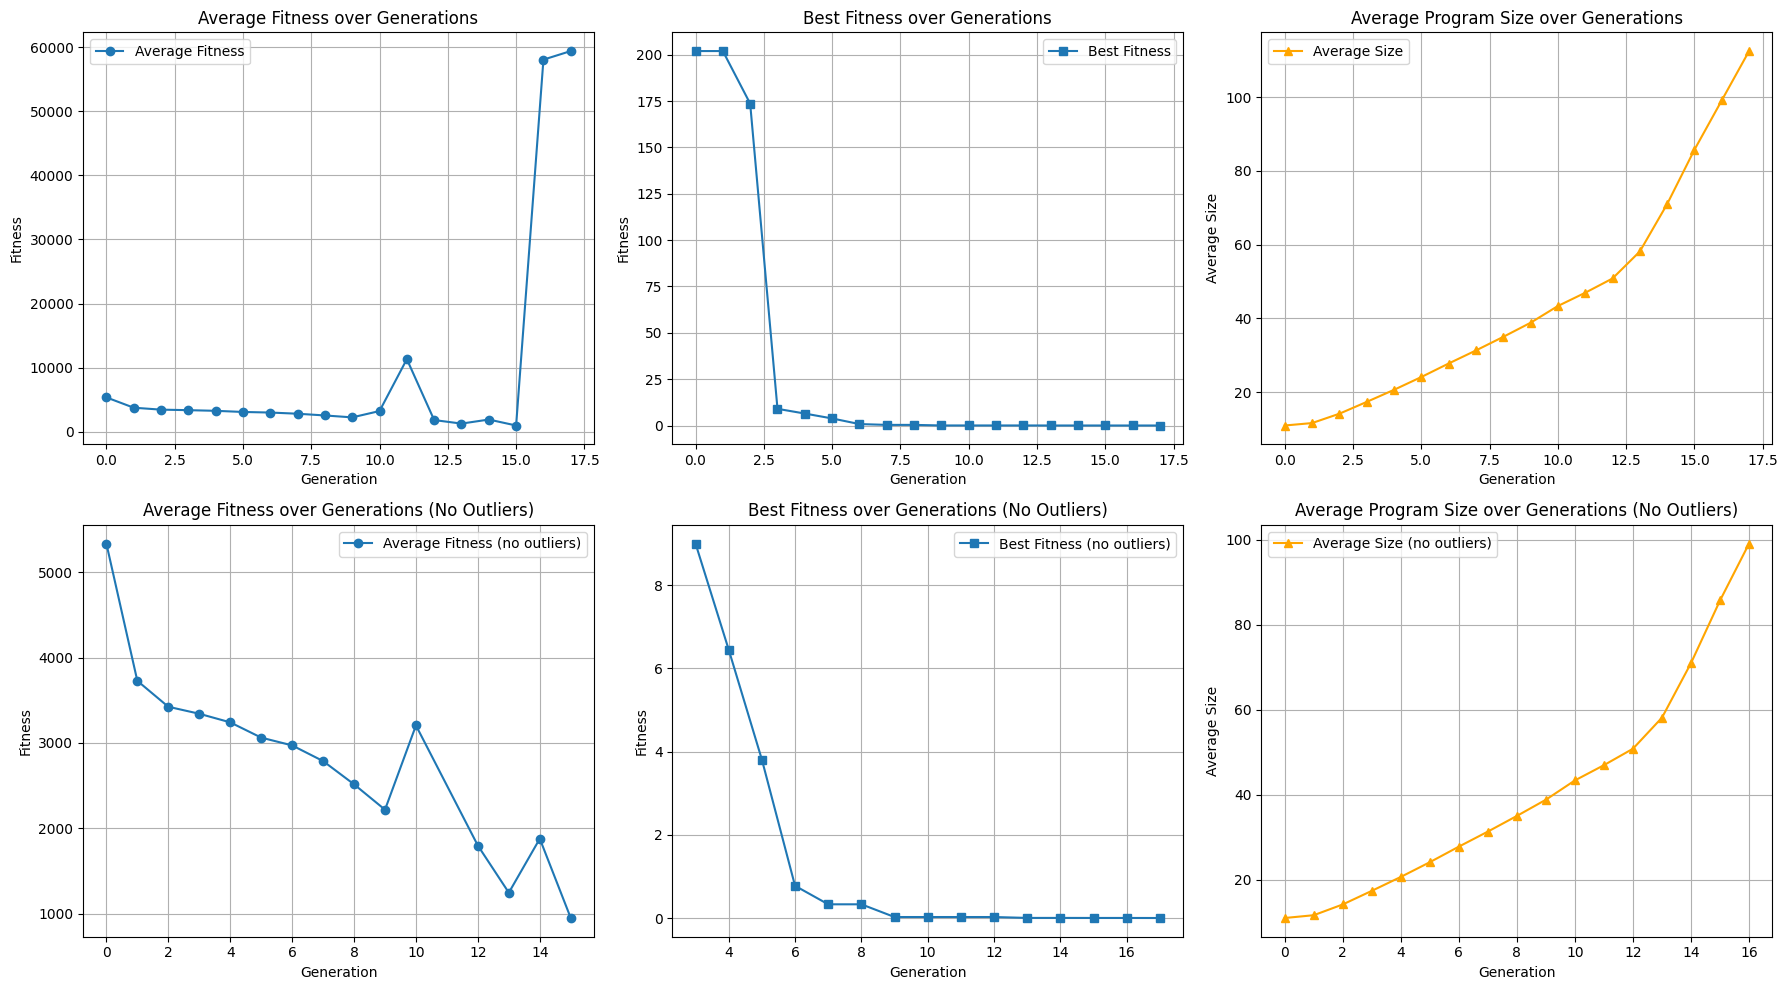

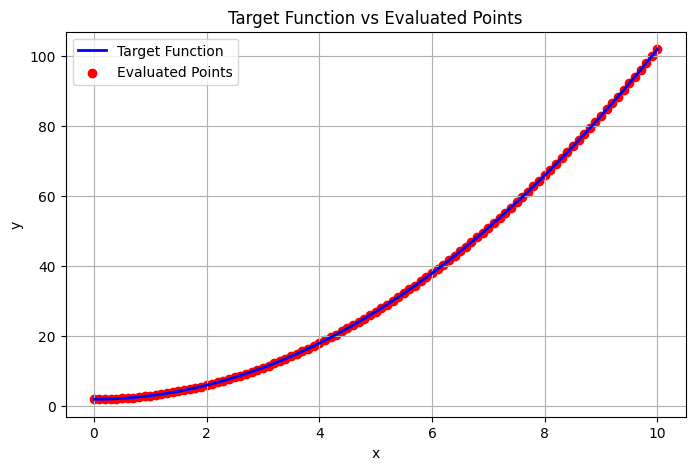

array([  2.99999179,   5.99999179,  10.99999179,  17.99999179,
        26.99999179,  37.99999179,  50.99999179,  65.99999179,
        82.99999179, 101.99999179])

In [3]:
tiny_gp = TinyGP(
    constant_count=100,
    min_random=-5,
    max_random=5,
    operations={Operation.ADD, Operation.MUL, Operation.SUB, Operation.DIV},
    goal_fitness=0.001,
    fitness_function=FitnessFunction.MAE,
    generations=30,
    population_size=100000,
    tournament_size=2,
    depth=5,
    mutation_probability=0.05,
    crossover_probability=0.9,
    max_length=10000
)
tiny_gp.fit(targets_np)
tiny_gp.hist.plot()
tiny_gp.plot()
tiny_gp.evaluate(
    np.asarray([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1)
)

In [2]:
class Problems:
    p1_a:GeneticSolver;p1_b:GeneticSolver;p1_c:GeneticSolver;p1_d:GeneticSolver;p2_a:GeneticSolver;p2_b:GeneticSolver;p2_c:GeneticSolver;p2_d:GeneticSolver;p3_a:GeneticSolver;p3_b:GeneticSolver;p3_c:GeneticSolver;p3_d:GeneticSolver;p4_a:GeneticSolver;p4_b:GeneticSolver;p4_c:GeneticSolver;p5_a:GeneticSolver;p5_b:GeneticSolver;p5_c:GeneticSolver;p5_d:GeneticSolver;p6_a:GeneticSolver;p7_a:GeneticSolver;p7_b:GeneticSolver;p8_a:GeneticSolver;p8_b:GeneticSolver;p8_c:GeneticSolver;p9_a:GeneticSolver;p9_b:GeneticSolver;p9_c:GeneticSolver;p9_d:GeneticSolver;p10_a:GeneticSolver;p11_a:GeneticSolver
    def __init__(self):
        for file in os.listdir("gps"):
            if file.endswith(".json"):
                self.__setattr__(f"p{file[3:-5].lstrip("problem")}", GeneticSolver.from_json(file[3:-5]))

In [3]:
problems = Problems()

# Problem 1: f(x) = 5x^3^ - 2x^2^ + 3x - 17

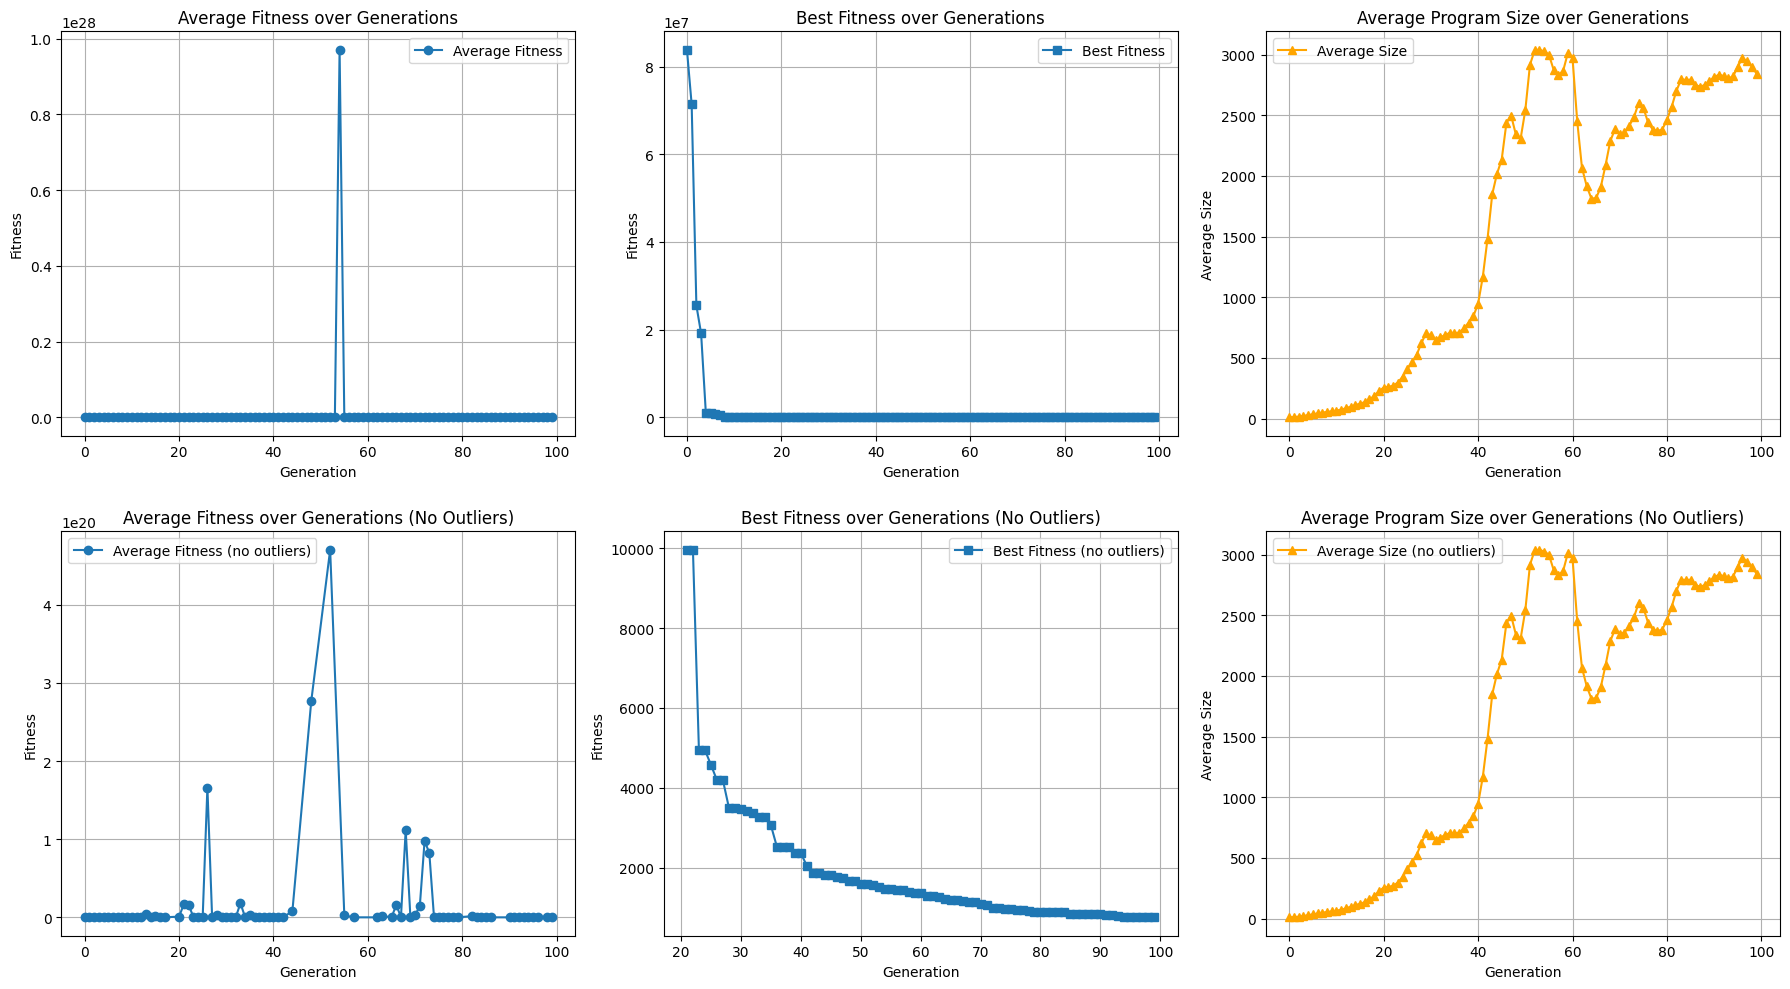

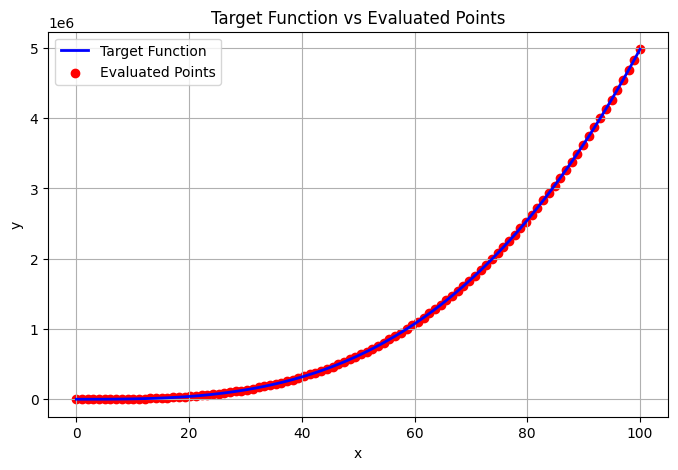

2.3827074056994393*X1*(-X1 + (2.0991521557456405*X1 + 0.75099246992401004)*(X1 + 0.35721215764145064 + 21.57381834344204/(-(9.004725633882353 + 0.5939202866822608/(-0.11391537762715171*X1 - 1.0787611919716615 - 0.75154432908354769*(-(-1.0804579923913868 + 4.700493126521485/(2.8473552839695006*(4.682336578495475 - 1.7674299733412414*(-1.6034223065734361*X1 - 13.322603290356065)/X1)*(515.83868514553445*X1 - 37447.624238825773) - 6.784414521771559))*(-15.376420830673245*X1 - 0.039302685512465674) + 2.7626784106351465)/(X1 - 3.316401552662629)))*(0.15206661687315751*X1 - 65.518255813110662 + 1.0032429855782903*(19.4535202032212*X1 - (1.0804579923913868 - 0.36404999893557763/(X1*(-4.0026550636577385*X1 - 7.3585520635693902 + 0.55882807821721012*(2.5060251065253931 - X1)/X1)))*(15.376420830673245*X1 + 0.039302685512465674) + 6.9654569368813207*(2.7994567894963515*X1 + 4.868679683536497/(466.89556133679753*X1 - 5.9710149863206863))*(16.02195395222811*X1 - (1.0804579923913868 - 0.3640499989355

In [7]:
problem = problems.p1_b
problem.hist.plot()
problem.plot()
print(problem.tiny_gp.best_individual.minimal_form)
#problem.to_mp4()

In [10]:
print(len(problem.tiny_gp.best_individual.minimal_form.__str__()))
print(len(problem.tiny_gp.best_individual.__str__()))

3525
43248


# Problem 2: f(x) = sin(x) + cos(x)

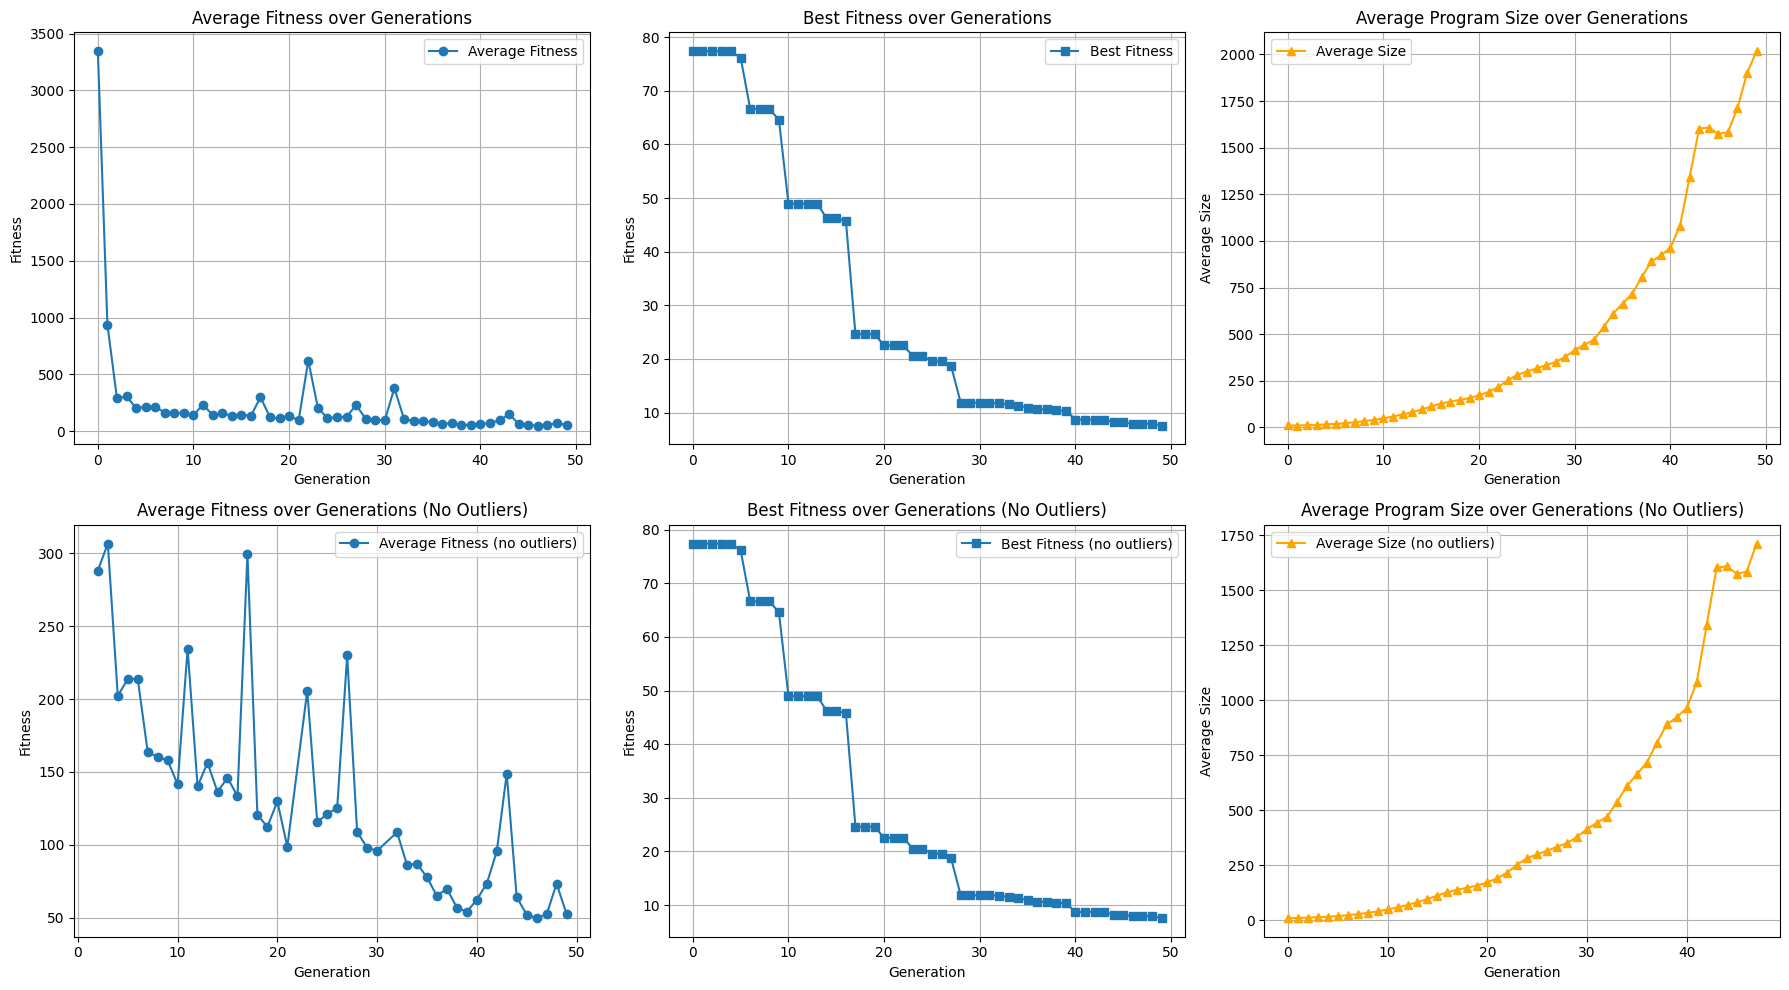

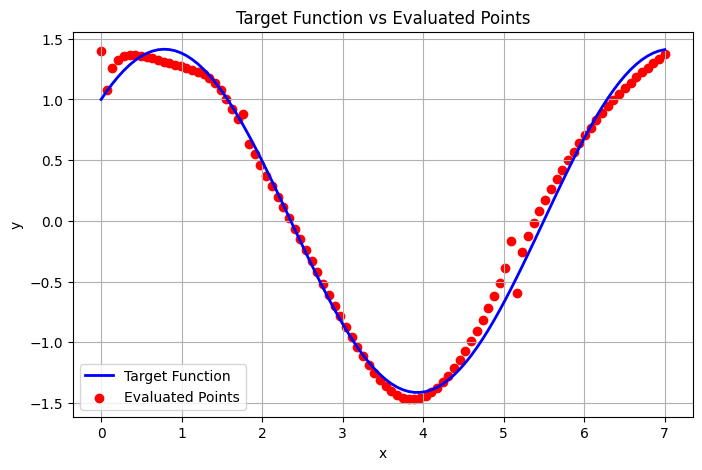

In [8]:
problem = problems.p2_b
problem.hist.plot()
problem.plot()
#problem.to_mp4()

# Problem 3: f(x) = 2 ln(x+1)

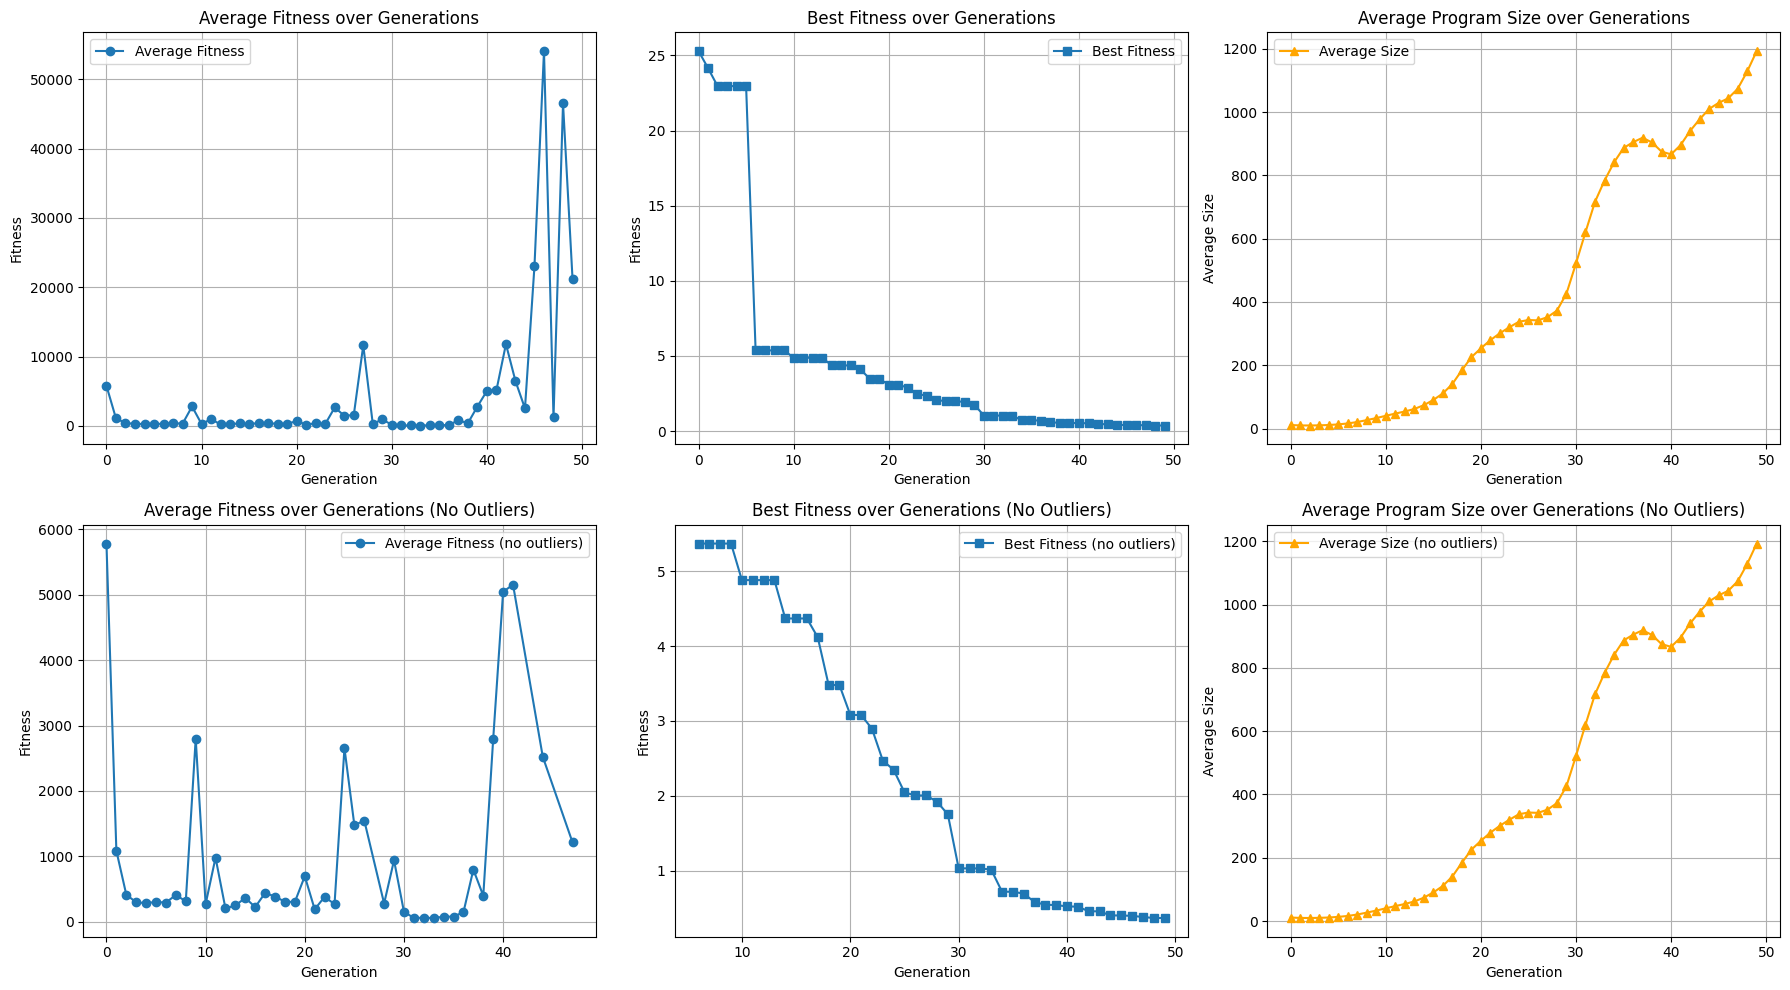

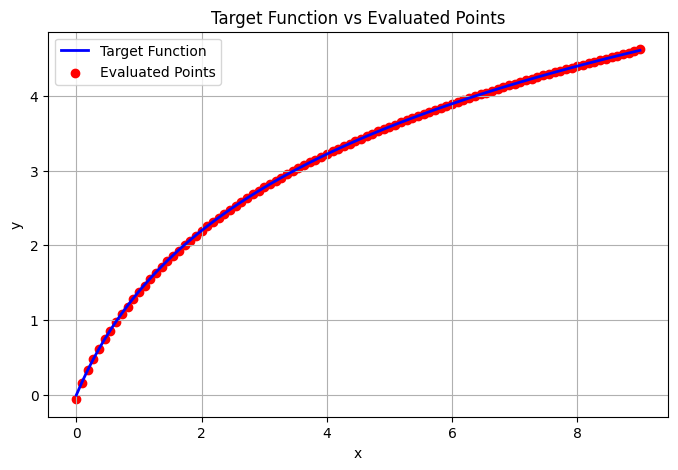

In [9]:
problem = problems.p3_b
problem.hist.plot()
problem.plot()
#problem.to_mp4()

# Problem 4: f(x,y) = x + 2y

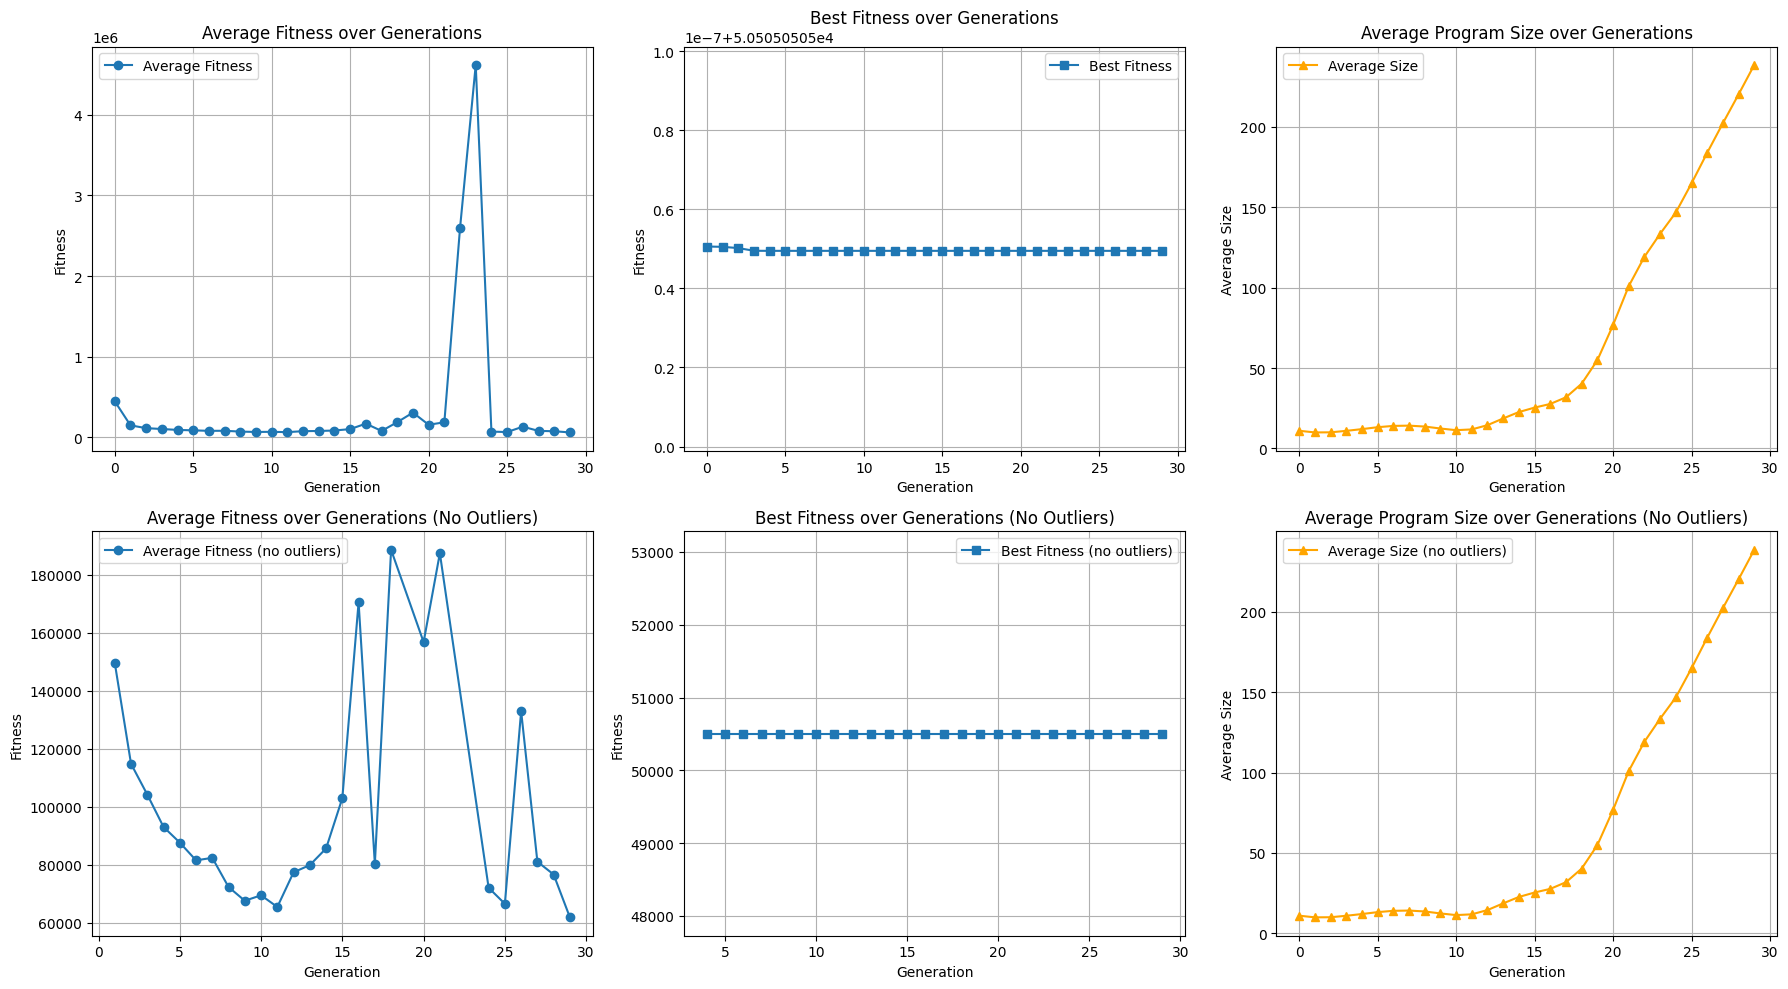

In [11]:
problem = problems.p4_b
problem.hist.plot()
problem.plot()

# Problem 5: f(x, y) = sin(x/2) + 2 cos(x)

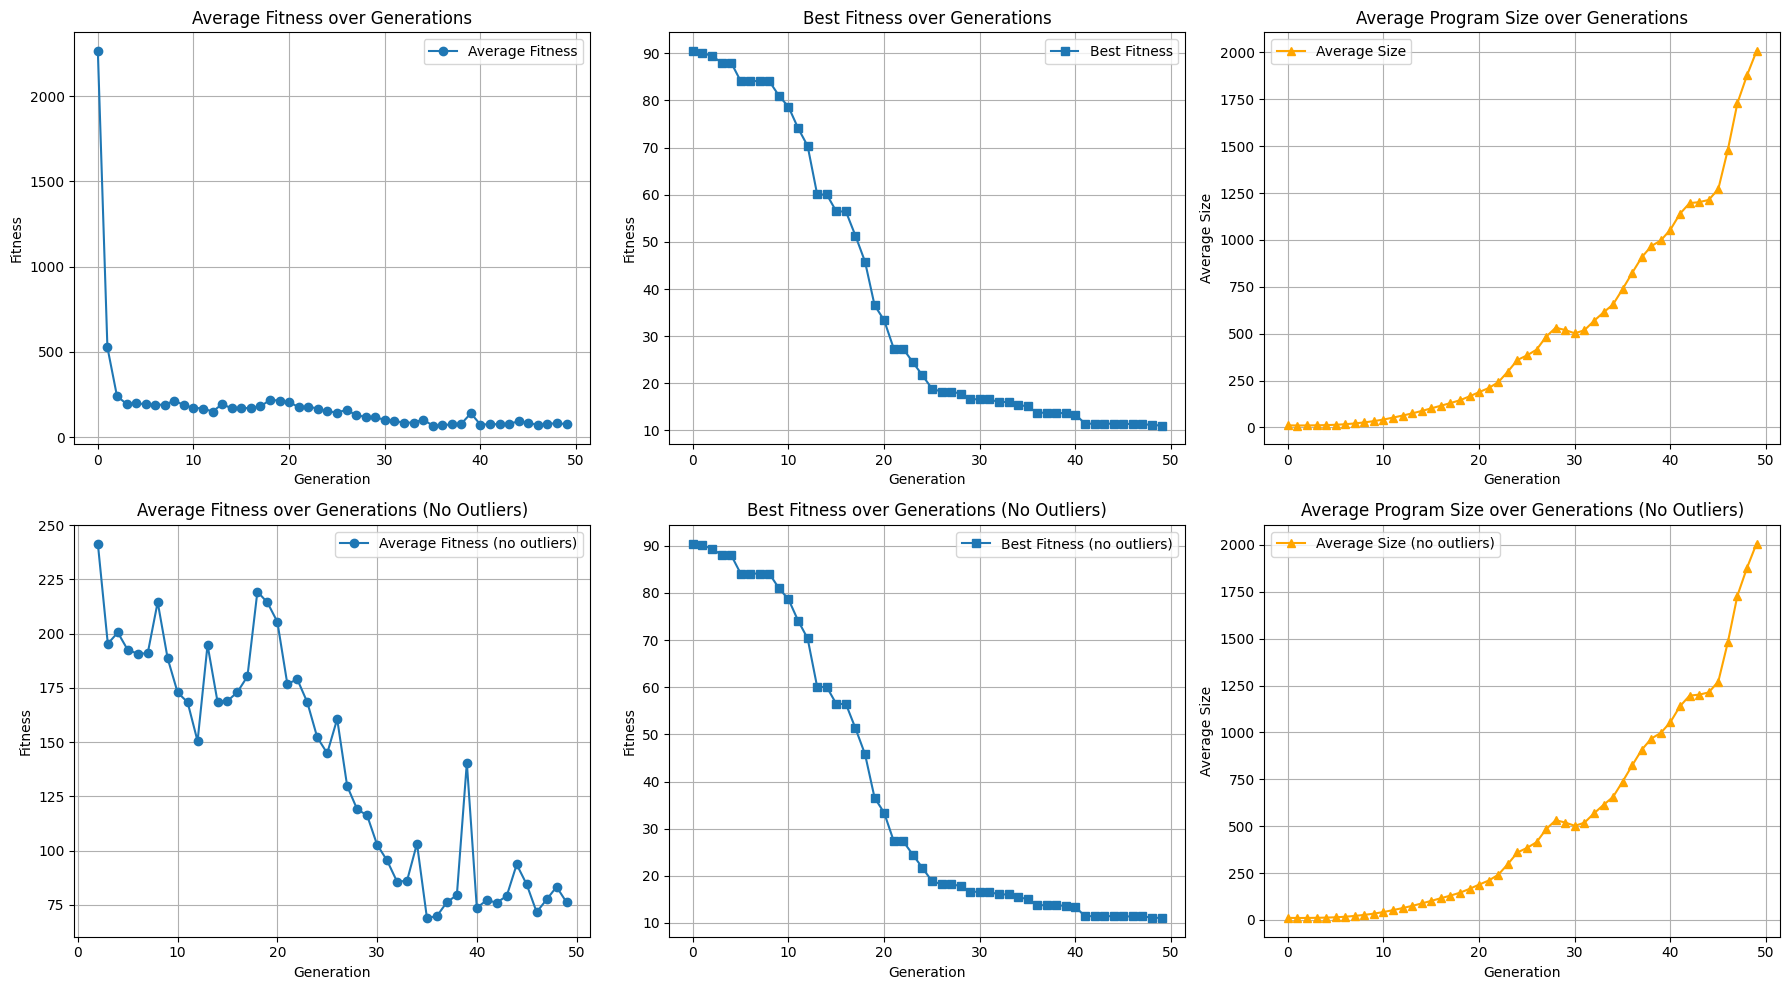

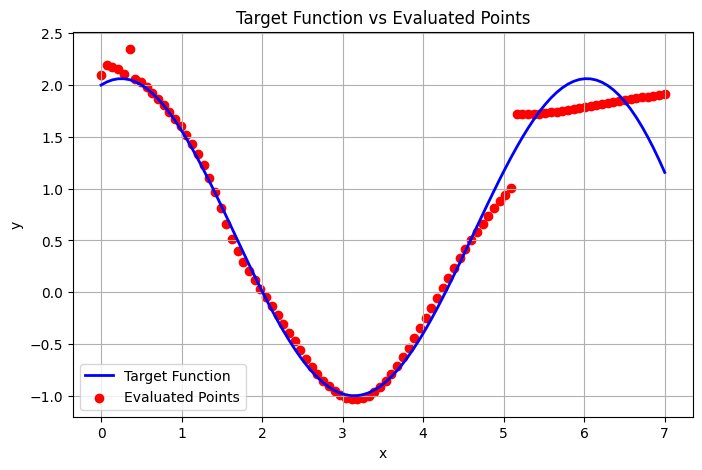

In [12]:
problem = problems.p5_b
problem.hist.plot()
problem.plot()
# problem.to_mp4()

# Problem 6: f(x,y) = x^2^ + 3xy - 7y + 1

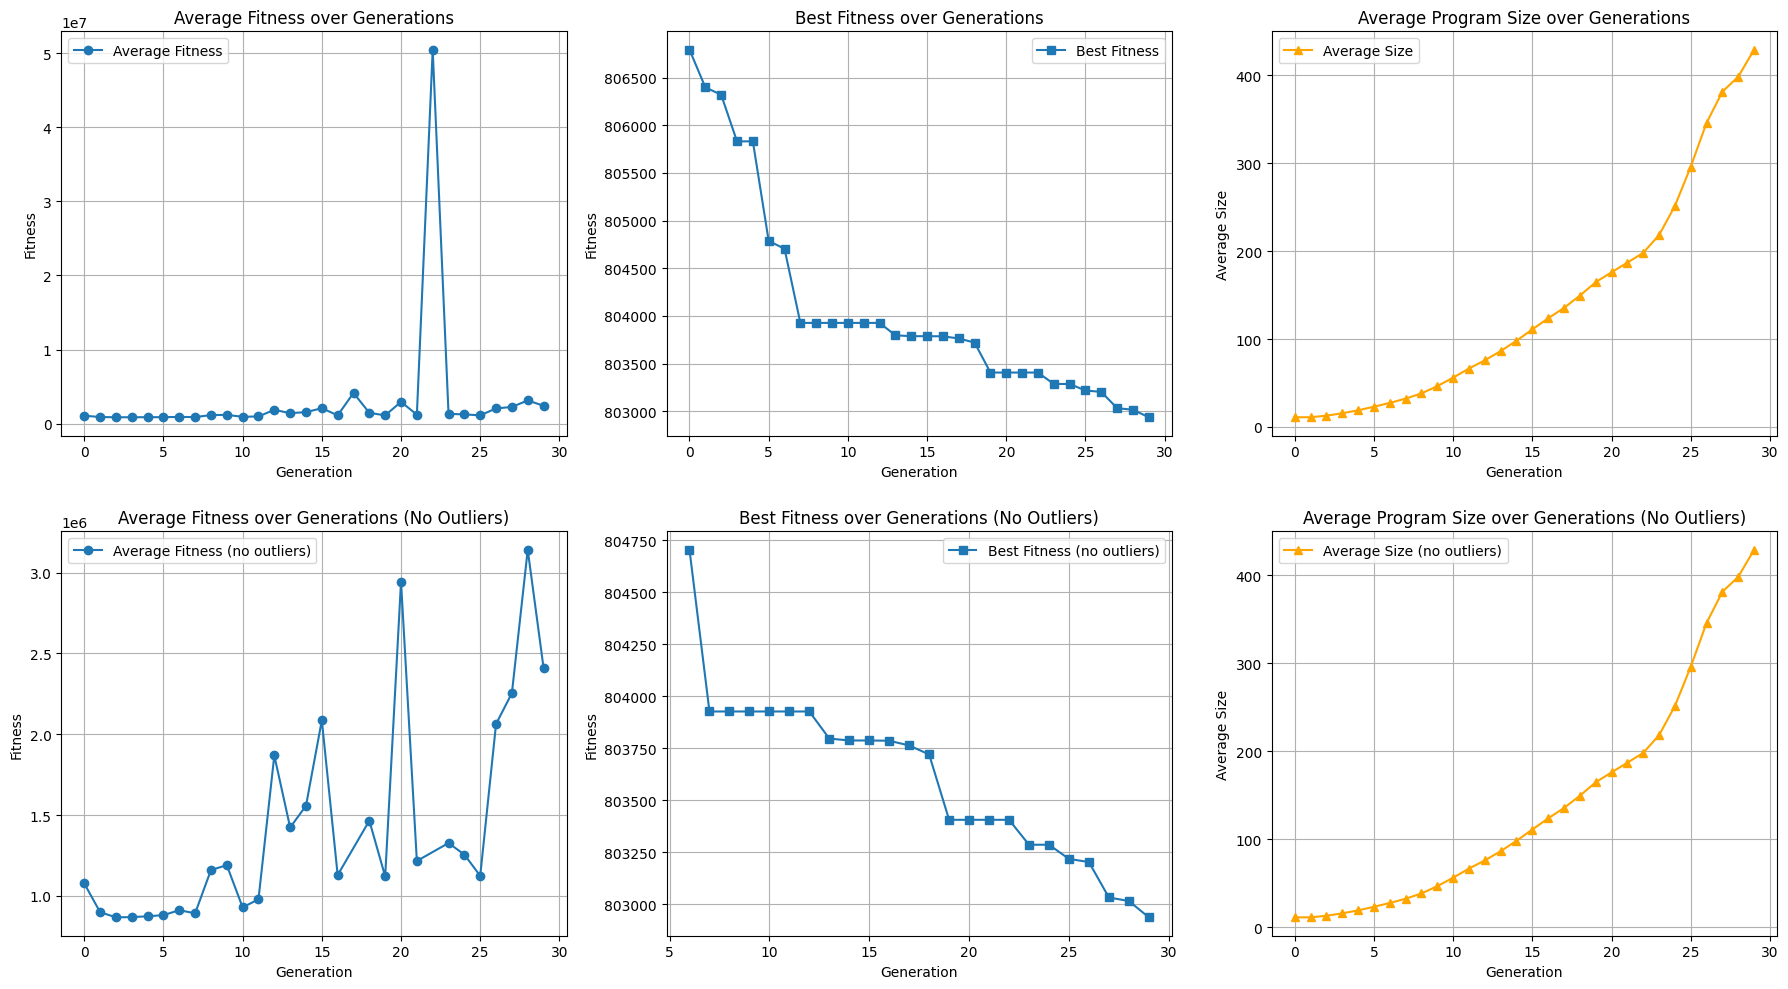

In [15]:
problem = problems.p6_a
problem.hist.plot()
problem.plot()

# Problem 7: f(x) = (1/sqrt(2*3.1415)) * exp (-(x^2^)/2)

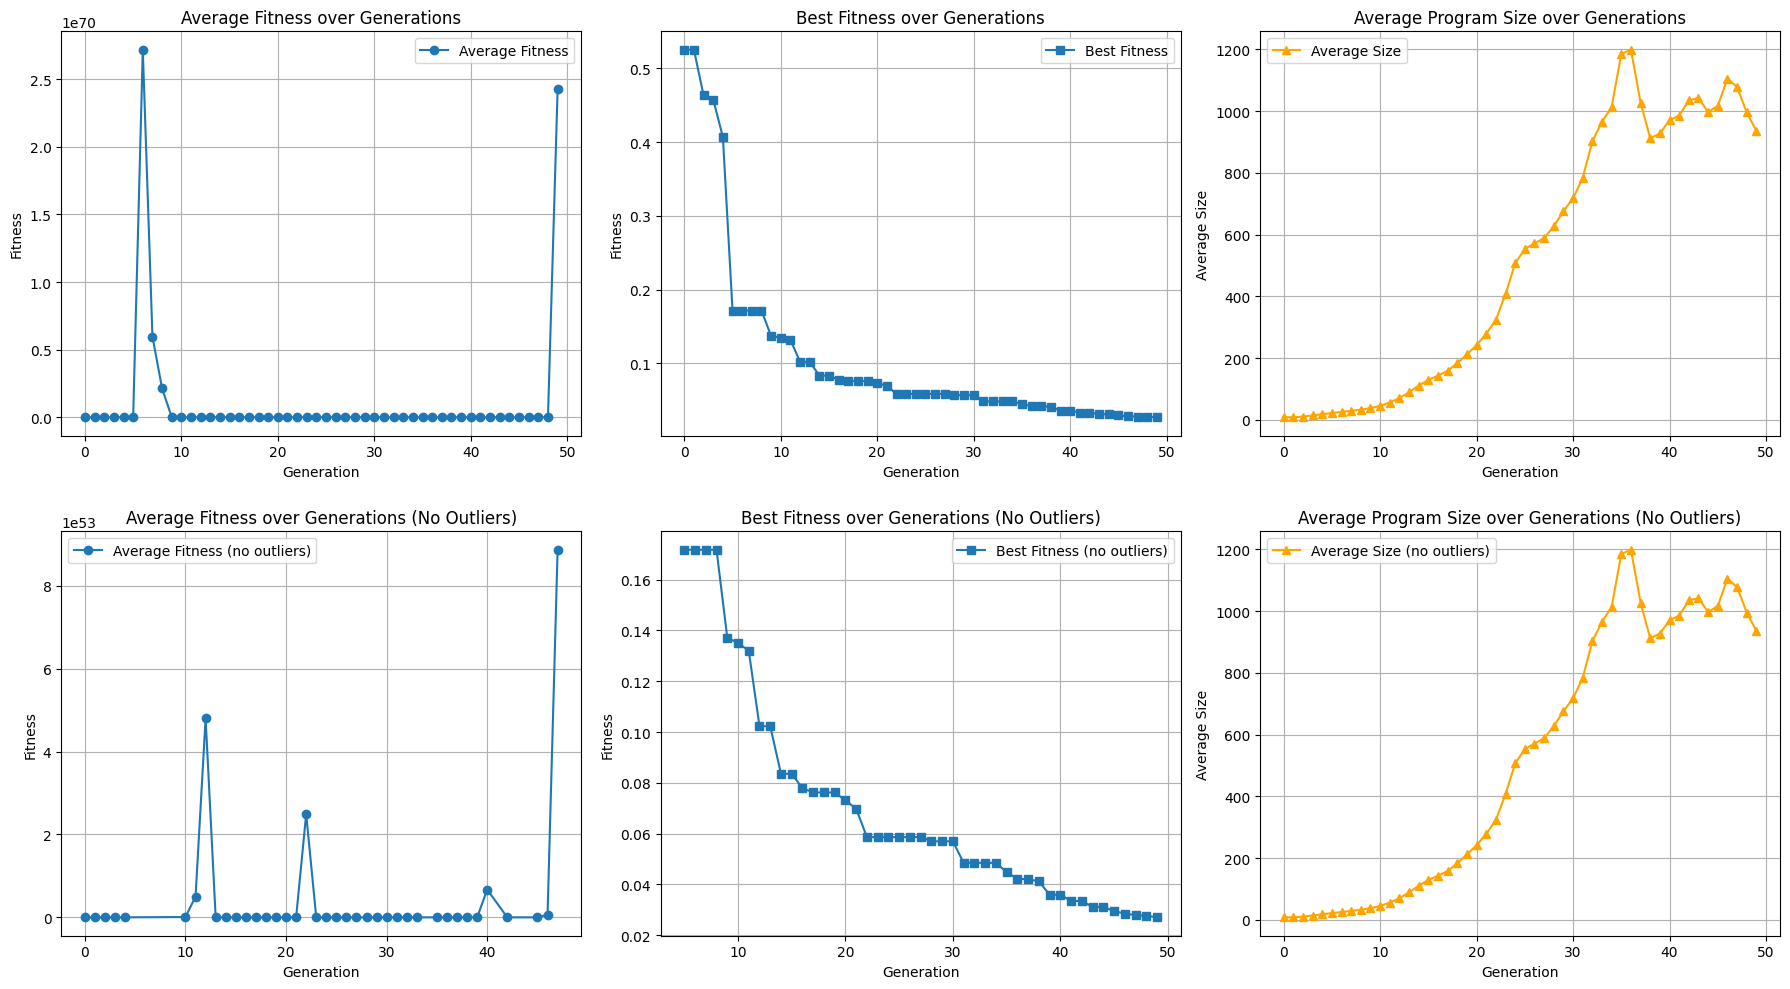

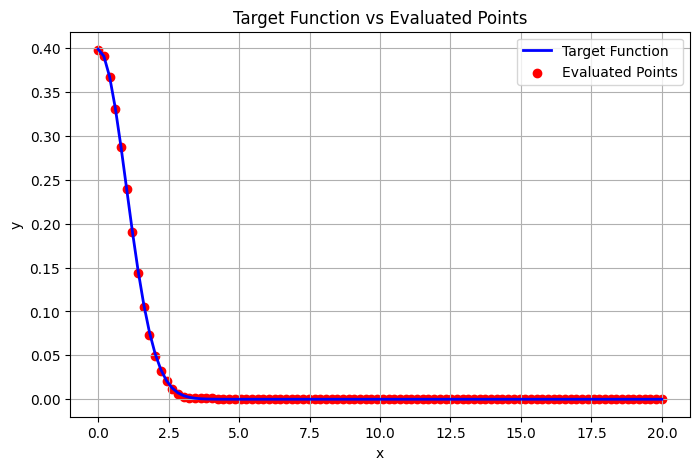

In [17]:
problem = problems.p7_b
problem.hist.plot()
problem.plot()
# problem.to_mp4()

# Problem 8: f(x) = sin(x) + cos(x)

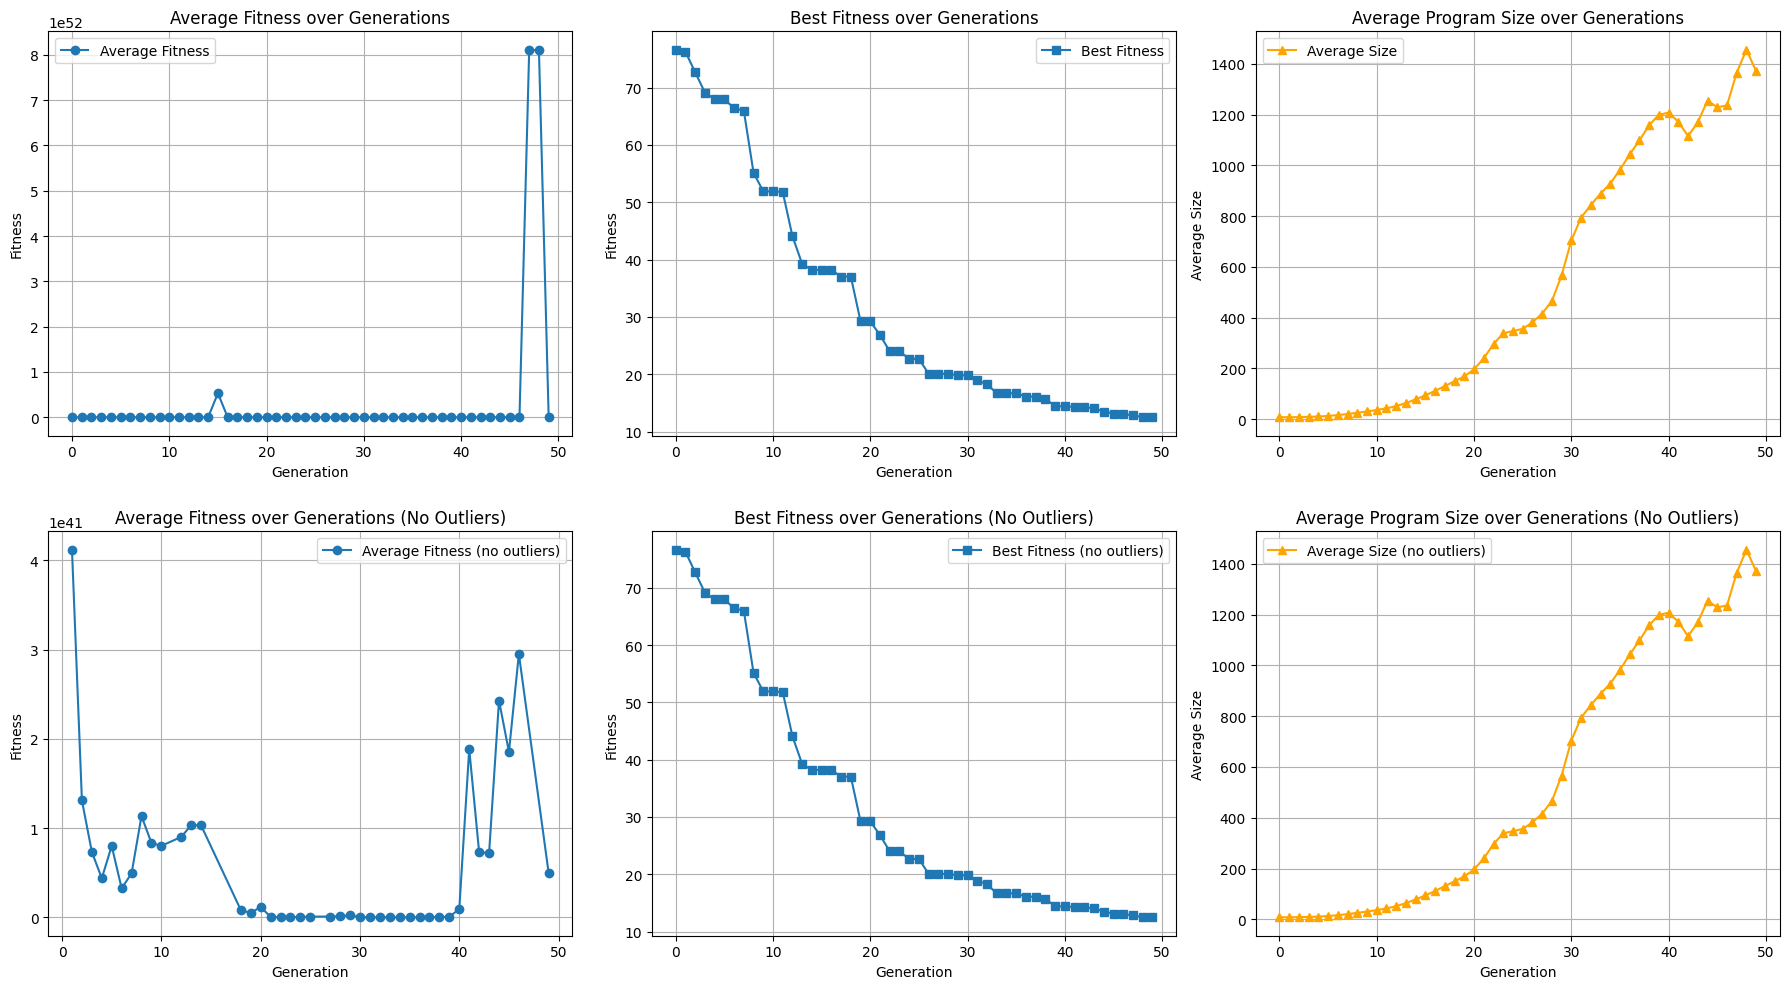

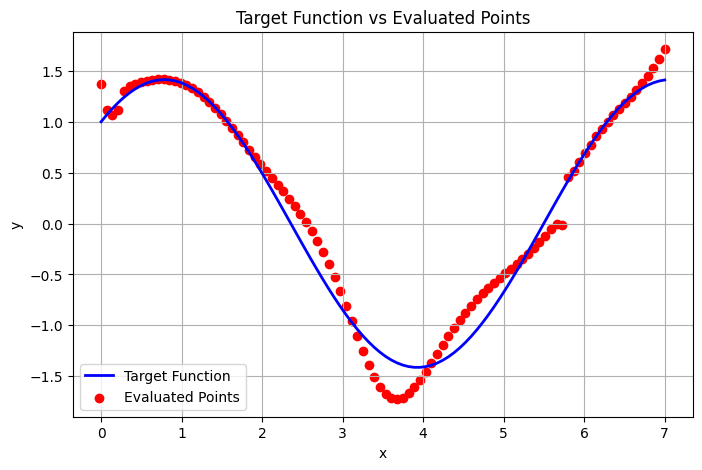

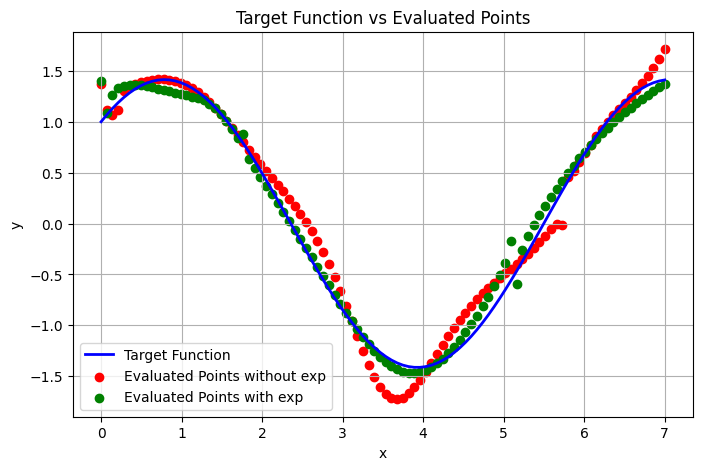

In [19]:
problem = problems.p8_a
problem.hist.plot()
problem.plot()
problem.compare_with_another(problems.p2_b)
# problem.to_mp4()

# Problem 8: f(x) = 5*x^3^ - 2x^2^ + 3x - 17

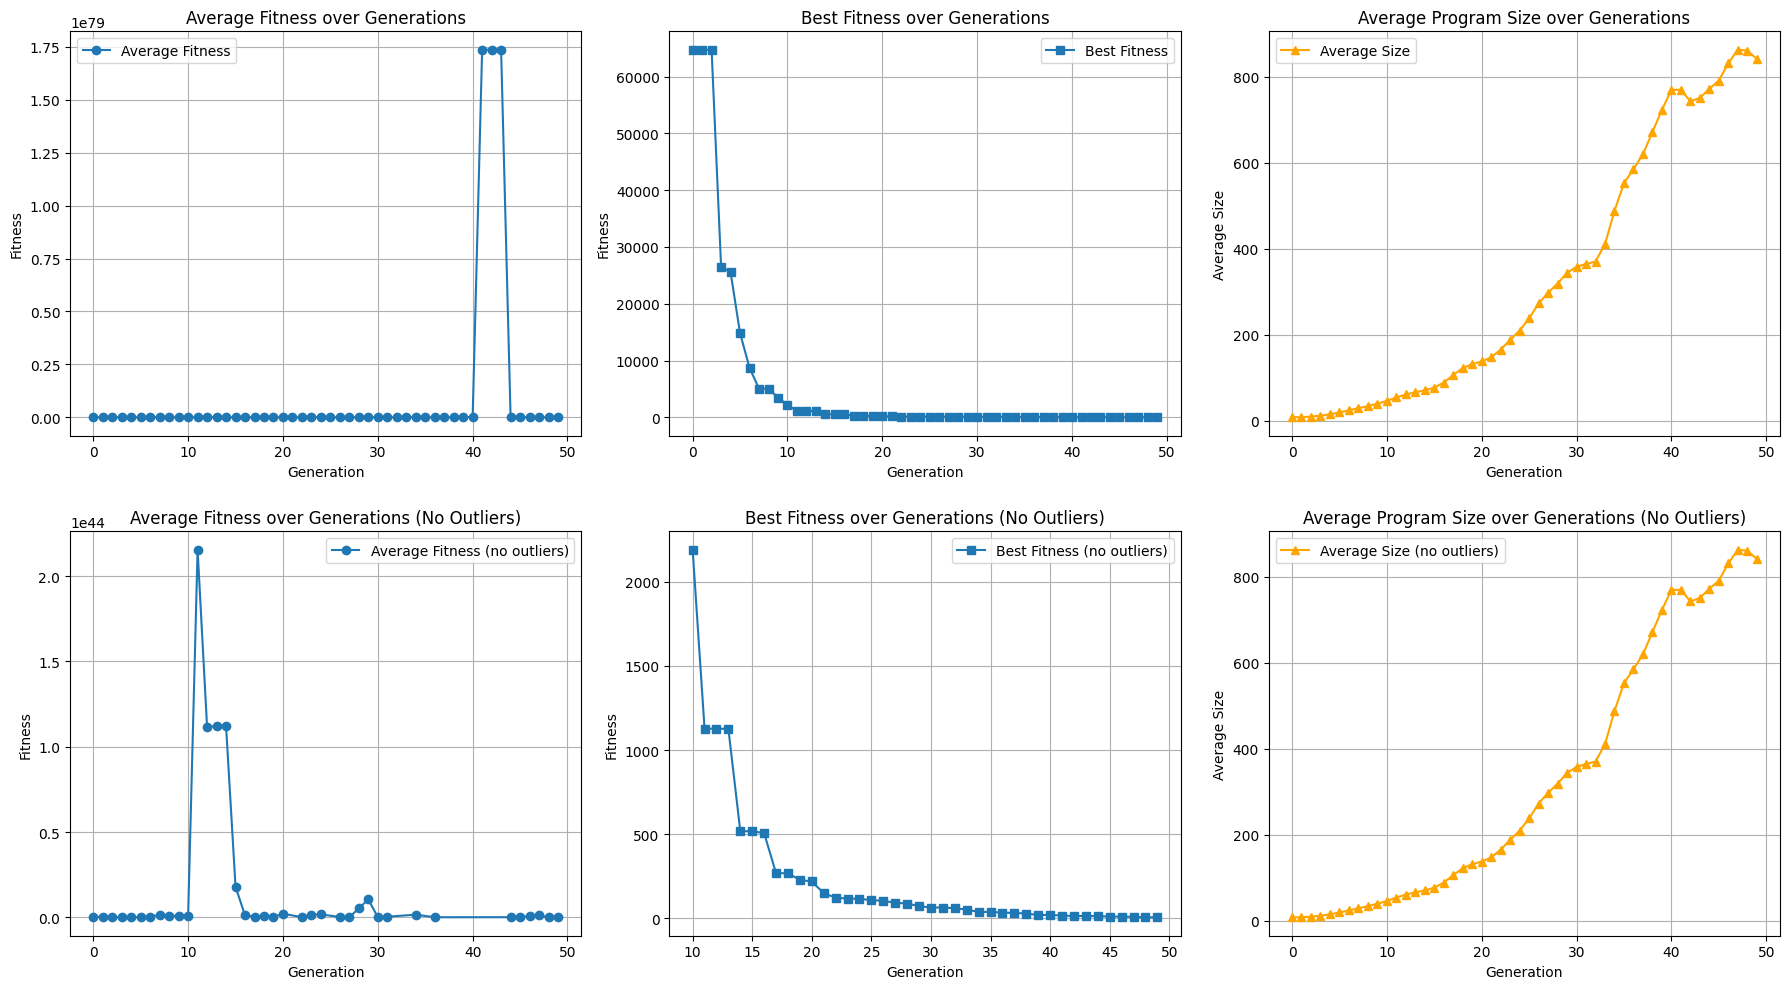

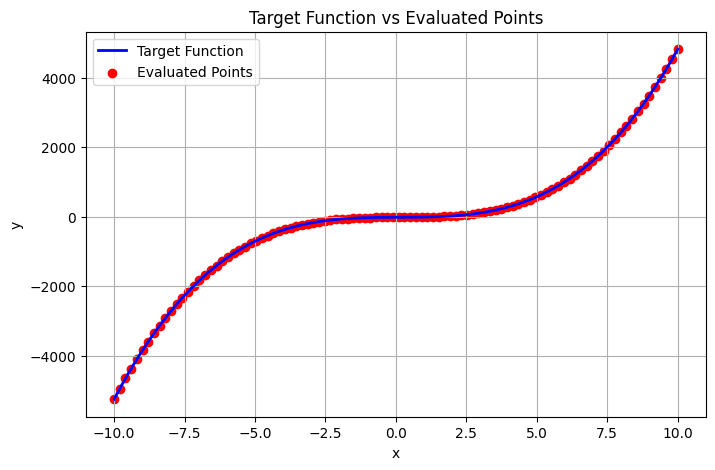

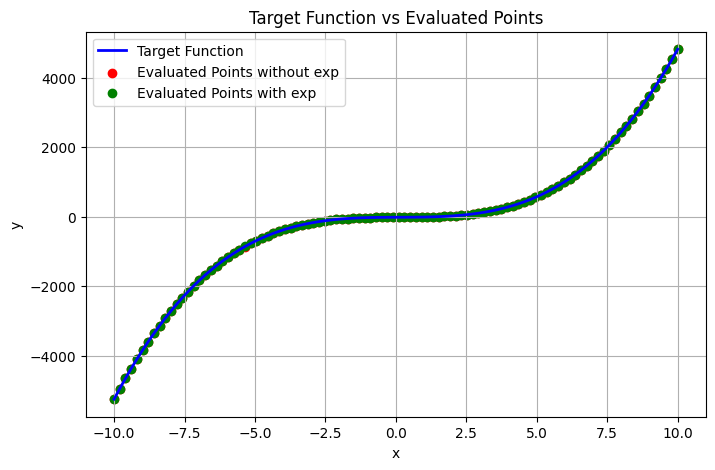

In [20]:
problem = problems.p8_b
problem.hist.plot()
problem.plot()
problem.compare_with_another(problems.p1_a)
# problem.to_mp4()

# Problem 8: f(x) = 2 ln(x+1)

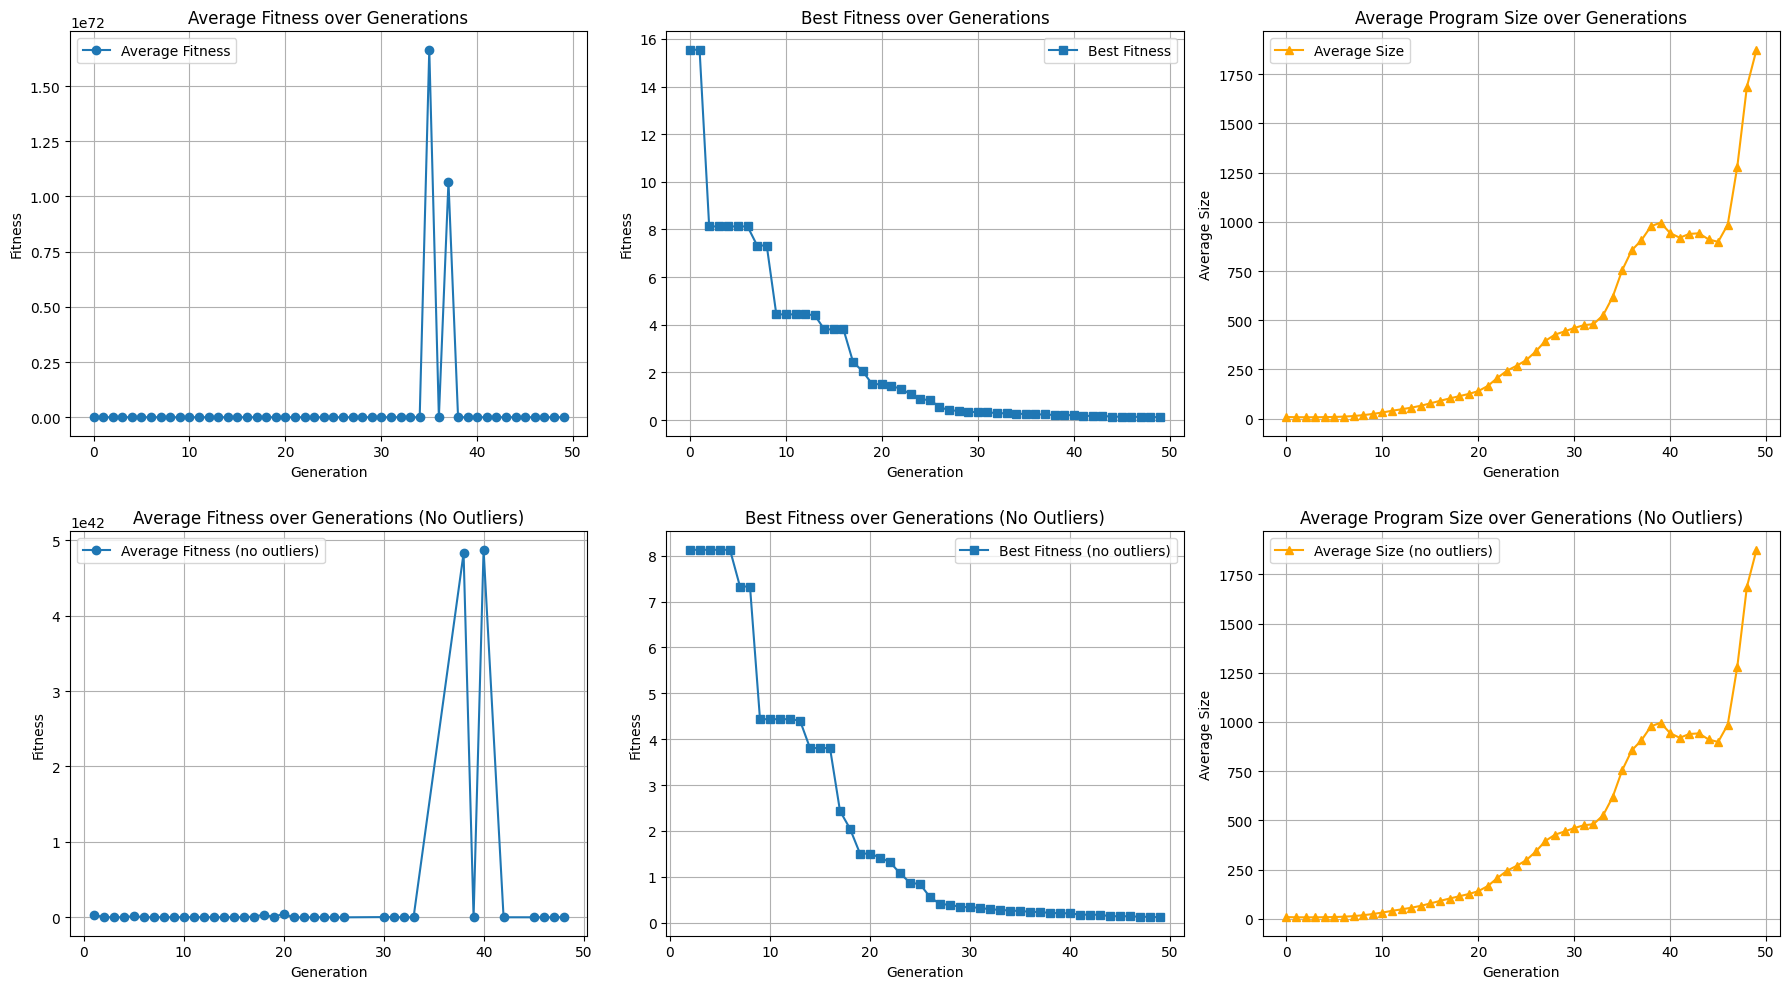

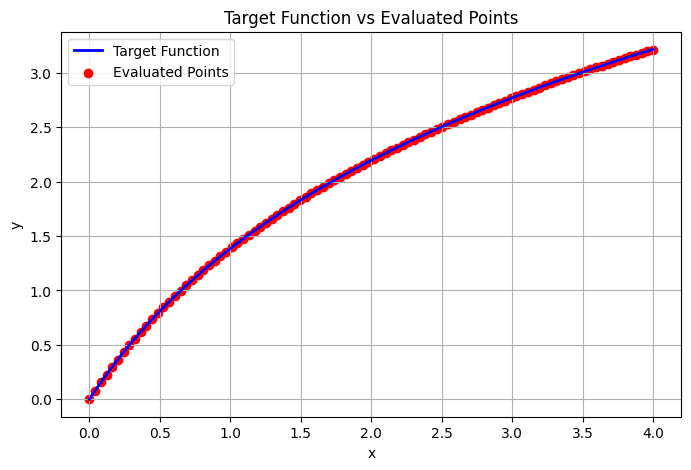

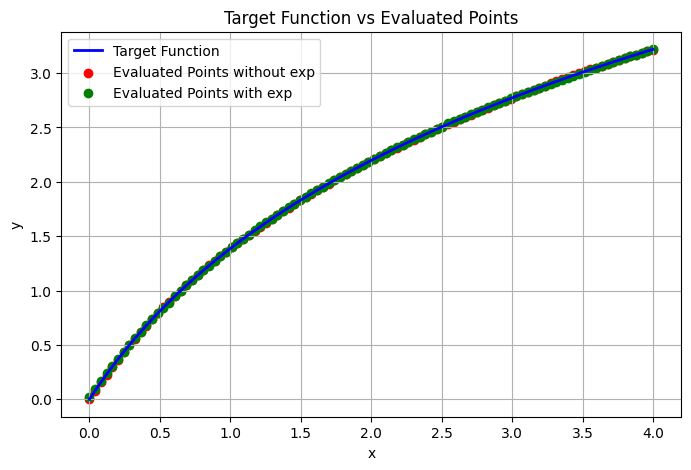

In [21]:
problem = problems.p8_c
problem.hist.plot()
problem.plot()
problem.compare_with_another(problems.p3_a)
# problem.to_mp4()

# Problem 9: f(x) = sin(x) + cos(x)

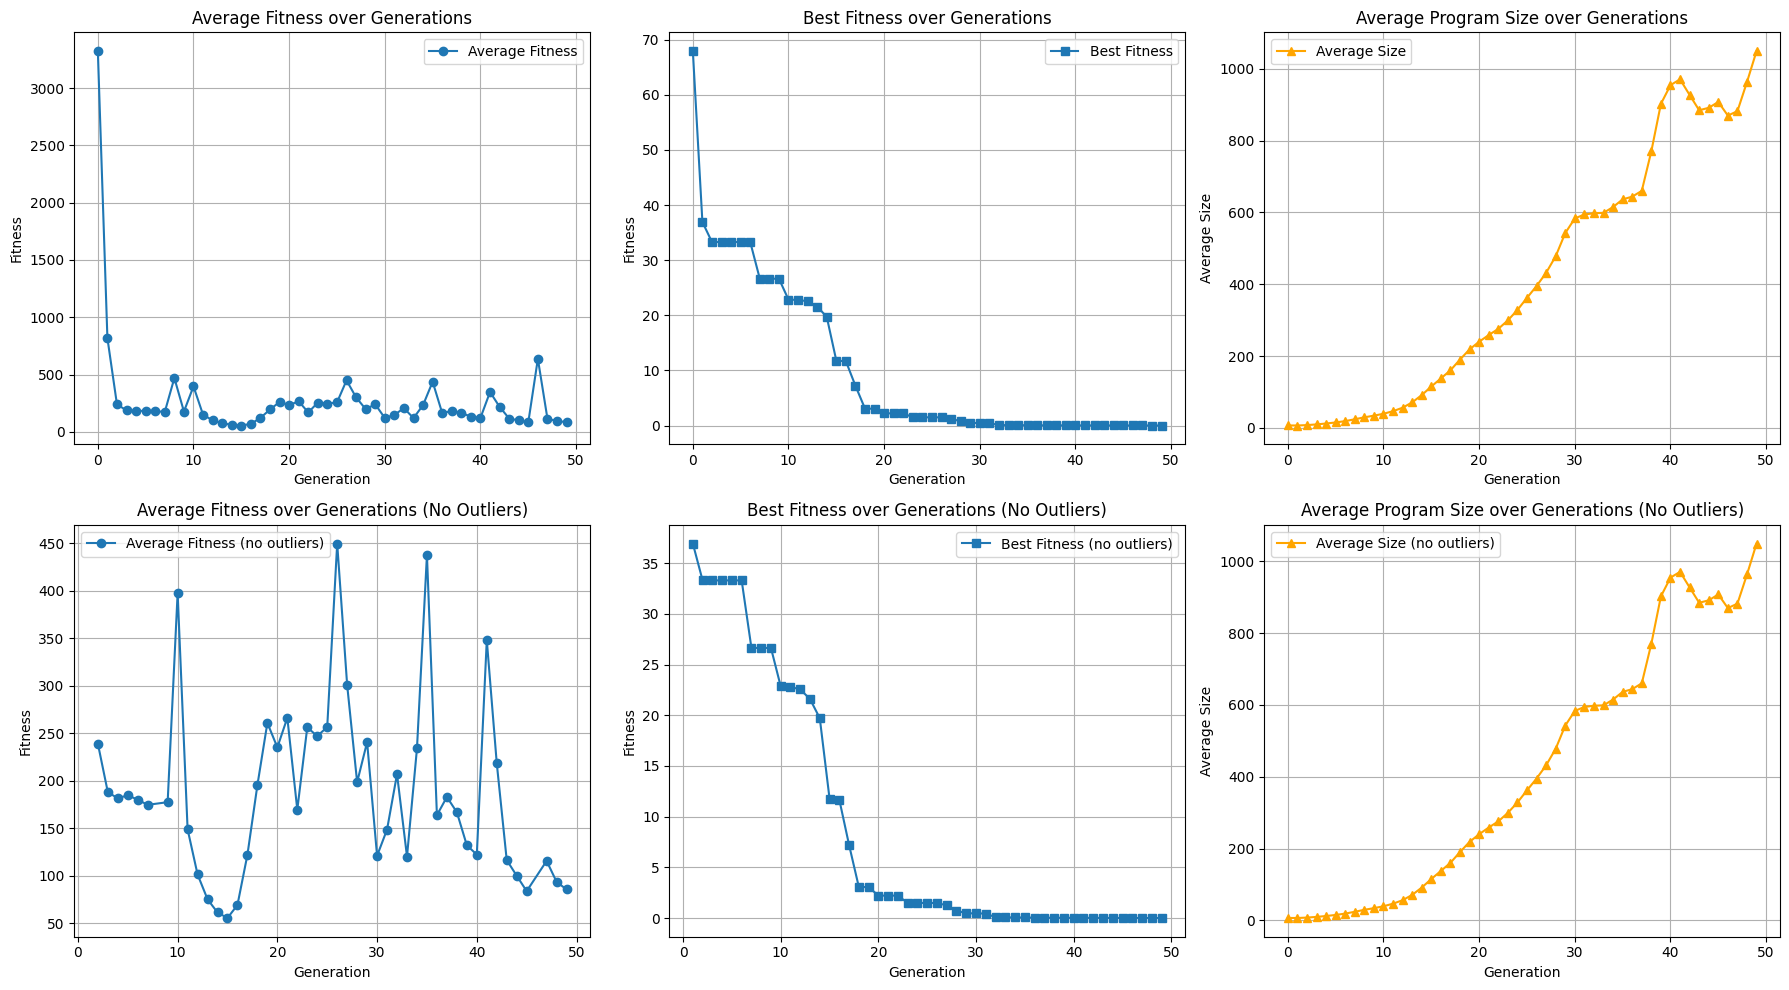

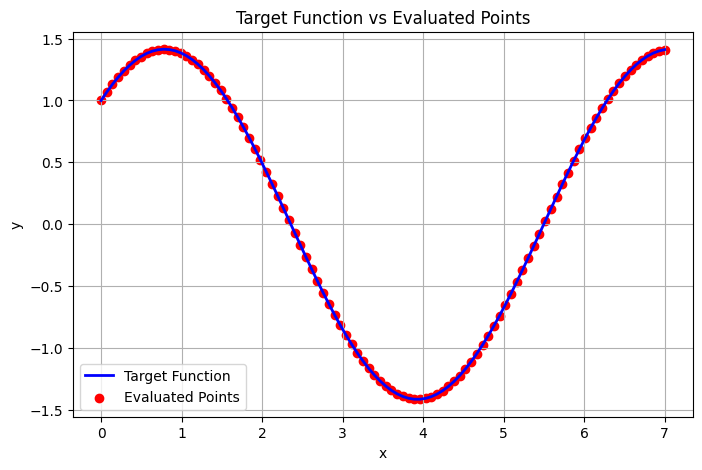

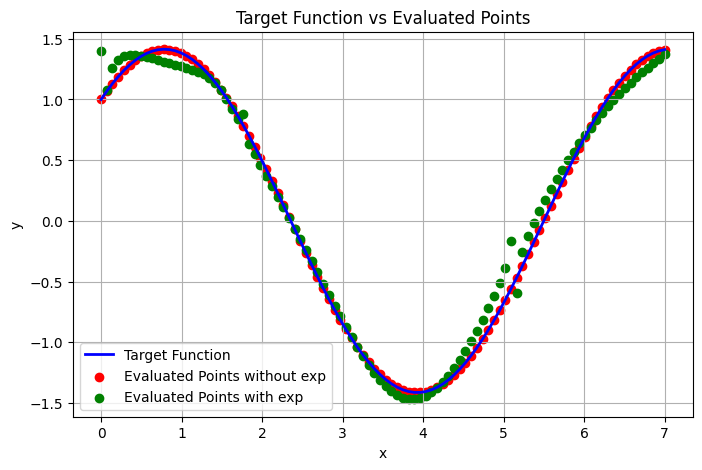

In [4]:
problem = problems.p9_b
problem.hist.plot()
problem.plot()
problem.compare_with_another(problems.p2_b)  # TODO better legend, make it customizable
# problem.to_mp4()

# Problem 10: f(x) = sin(x + 3.141593 / 2)

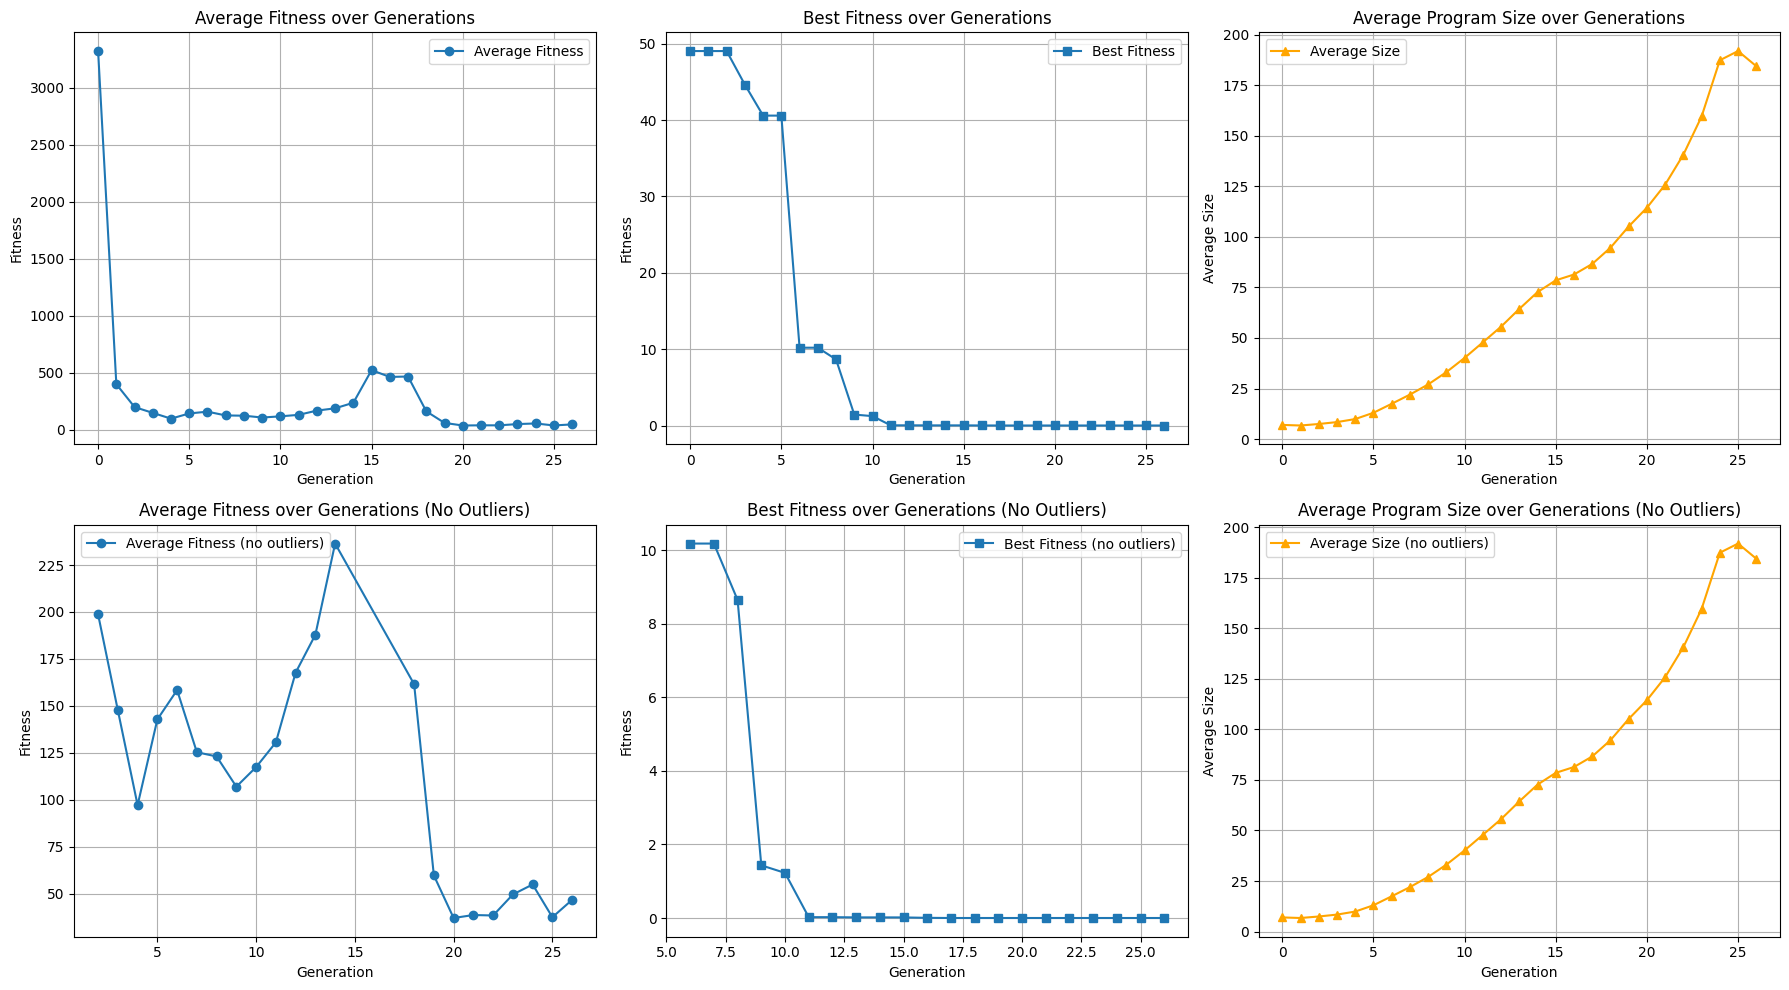

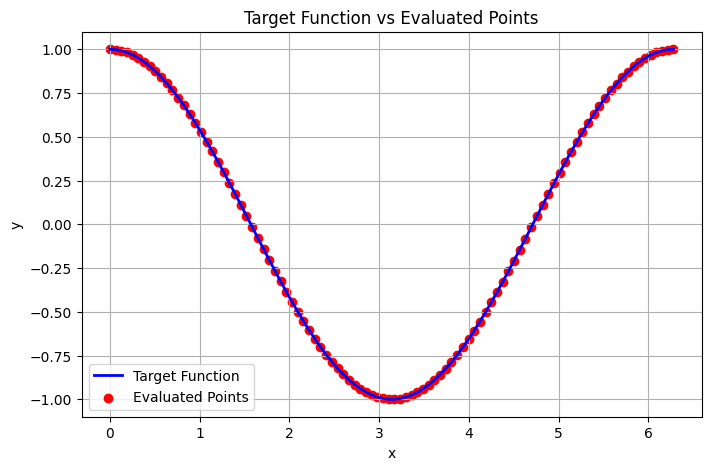

In [5]:
problem = problems.p10_a
problem.hist.plot()
problem.plot()
# problem.to_mp4()

# Problem 11: f(x) = tan(2x + 1)

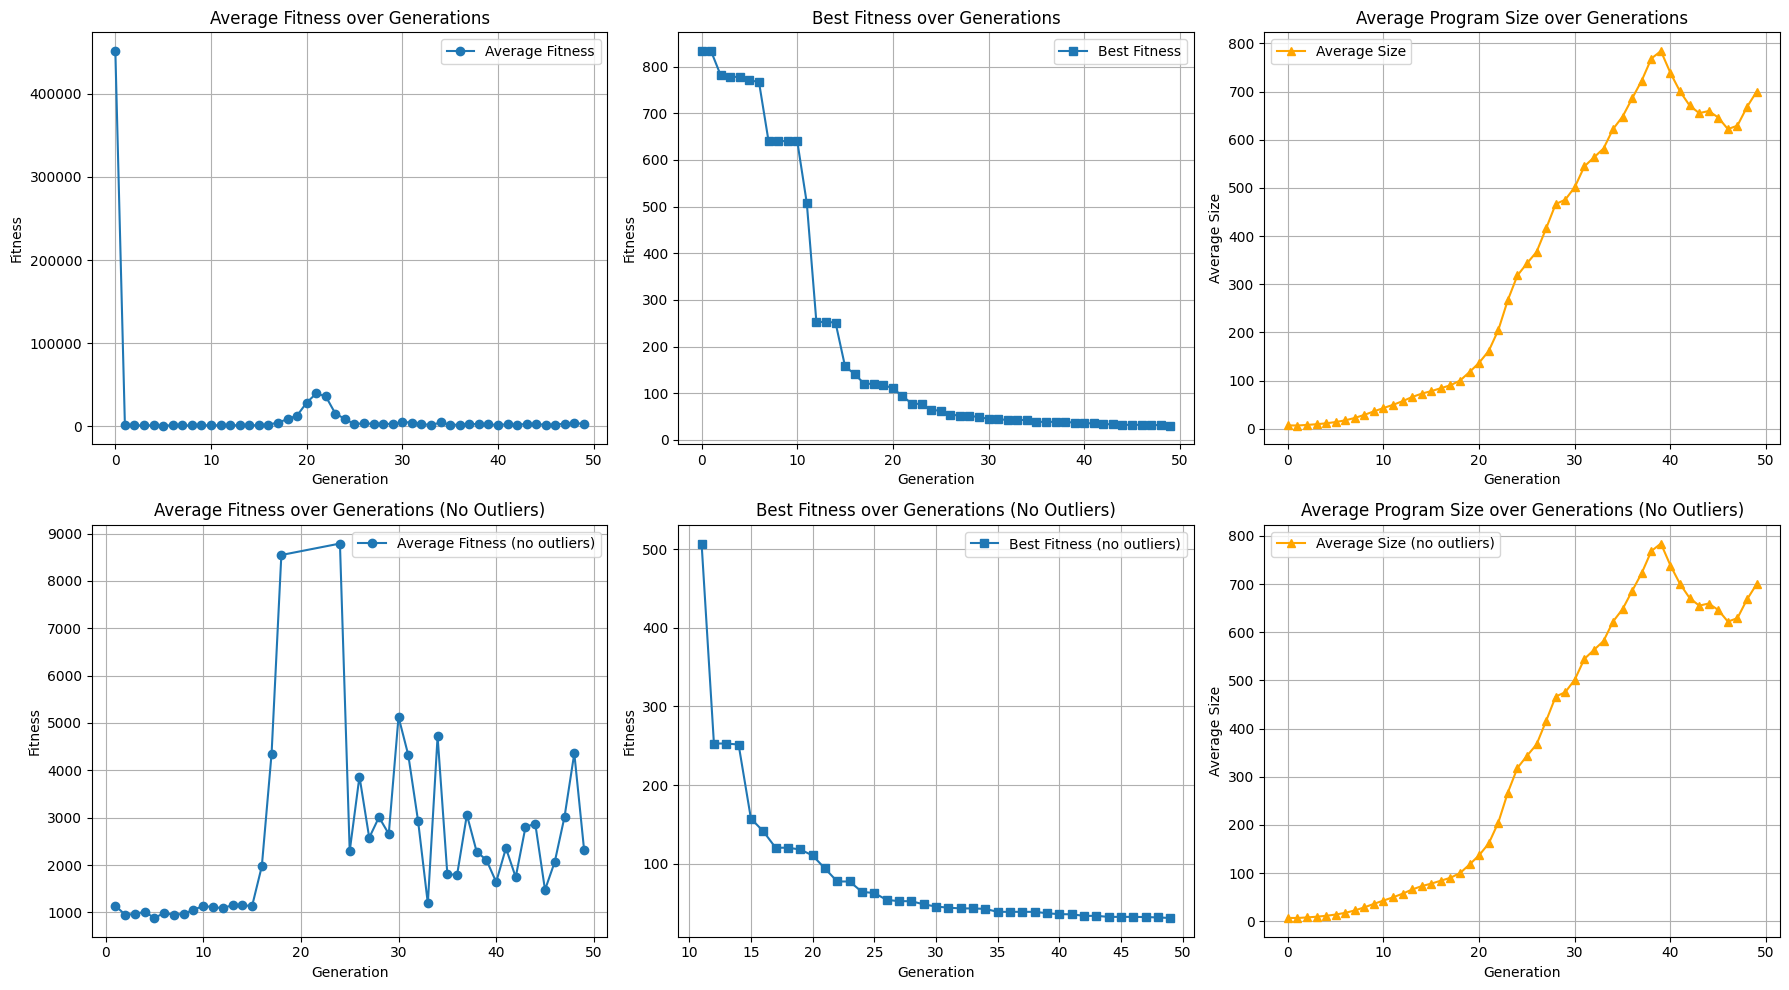

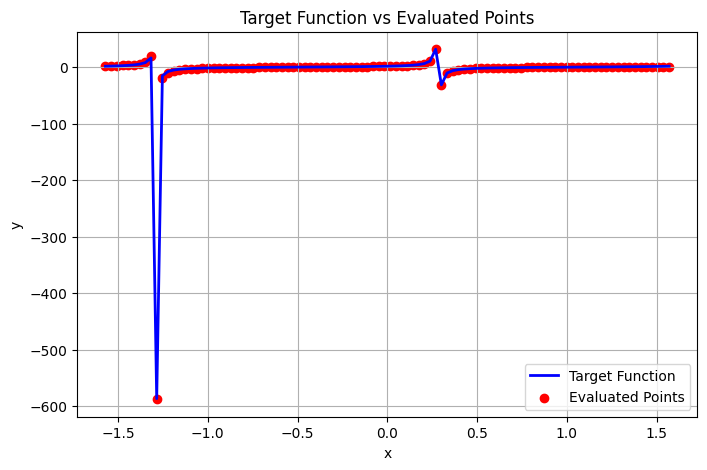

In [6]:
problem = problems.p11_a
problem.hist.plot()  # TODO fix the domain and run it again
problem.plot()
# problem.to_mp4()

# Comparing optimizations

In [9]:
import pandas as pd

old = [36839, 30781, 35808, 24716, 28447, 26252, 25819, 27857, 32878, 31533]
simp_rec = [13436, 13158, 13584, 20782, 18087, 17934, 18318, 17847, 19787, 19081]
simp_iter = [10902, 14096, 13635, 14650, 15307, 12418, 12343, 12320, 12010, 11758]
threaded = [3864, 4050, 3945, 4167, 4314, 4360, 4176, 4186, 4492, 5594]

data = {
    "Original": old,
    "Simplification": simp_rec,
    "Simplification + Iterative": simp_iter,
    "Multithreaded": threaded
}

df = pd.DataFrame(data)

means = df.mean() / 1000
stds = df.std() / 1000

gain_prev = [0]
gain_old = [0]

for i in range(1, len(means)):
    prev = means.iloc[i - 1]
    current = means.iloc[i]
    gain_prev.append(prev / current)
    gain_old.append(means.iloc[0] / current)

result = pd.DataFrame({
    "Algorithm": means.index,
    "Avg Runtime [s]": means.values,
    "± Std [s]": stds.values,
    "x Faster than Previous": gain_prev,
    "x Faster than Original": gain_old
})

result = result.round({
    "Avg Runtime [s]": 3,
    "± Std [s]": 3,
    "x Faster than Previous": 2,
    "x Faster than Original": 2
})

"""
Test settings: 10 runs, one generation with fixed seed with same starting population
Population: avg_size=553, pop_size=100_000
Threads used: 4
Java: JDK 21
Processor: Intel Core i3 11th gen, 3GHz, 2 cores, 4 logic cores, x86-64 architecture
RAM: 2x8GB, 2,6GHz, DDR4
"""

result

Algorithm  Avg Runtime [s]  ± Std [s]  \
0                    Original           30.093      4.191   
1              Simplification           17.201      2.782   
2  Simplification + Iterative           12.944      1.405   
3               Multithreaded            4.315      0.487   

   x Faster than Previous  x Faster than Original  
0                    0.00                    0.00  
1                    1.75                    1.75  
2                    1.33                    2.32  
3                    3.00                    6.97